# Multiple Linear Regression (Song Popularity Prediction)

## Explanation

### Objective

create a machine learning model that can predict a song popularity, using Multiple Linear Regression algorithm.

### Column Descriptions

- ***song_name*** = Song title.
- ***song_popularity (target)*** = Song popularity level (0-100).
- ***song_duration_ms*** = Song duration in milliseconds.
- ***acousticness*** = Song's "acoustic" level (0.0 - 1.0). The higher the number, the more acoustic (without electric/synth).
- ***danceability*** = How danceable this song is (0.0 - 1.0).
- ***energy*** = Song energy/intensity level (0.0 - 1.0). Metal songs are high energy, sleep songs are low.
- ***instrumentalness*** = Prediction of whether this song is solely instrumental without vocals (0.0 - 1.0).
- ***key*** = Song's root note (0 = C, 1 = C#, 2 = D, etc.). This is actually a category.
- ***liveness*** = Detects whether this song is a live or studio recording. High values ​​= live performance.
-  ***Loudness*** = Sound level in decibels (dB). Usually a negative number (e.g., -5 dB).
- ***audio_mode*** = Song modality (1 = Major, 0 = Minor). It's a number, so it's safe.
- ***speechiness*** = How many words are spoken (e.g., Rap/Podcast).
- ***tempo*** = Song speed in BPM (Beats Per Minute).
- ***time_signature*** = Time signature (e.g., 4 beats, 3 beats).
- ***audio_valence*** = Song "happiness" level (0.0 - 1.0). High = Happy/Cheerful, Low = Sad/Depressed.

## A. Data Preparation

### A.1 Import Libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [26]:
try:
    df = pd.read_csv('song_data.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Berhasil Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [27]:
df.shape

(18835, 15)

### A.4 Viewing Data Informations

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


### A.5 Viewing Data Statistics

In [29]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.00,52.99,21.91,0.00,40.00,56.00,69.00,100.00
song_duration_ms,18835.00,218211.59,59887.54,12000.00,184339.50,211306.00,242844.00,1799346.00
acousticness,18835.00,0.26,0.29,0.00,0.02,0.13,0.42,1.00
danceability,18835.00,0.63,0.16,0.00,0.53,0.65,0.75,0.99
energy,18835.00,0.64,0.21,0.00,0.51,0.67,0.81,1.00
instrumentalness,18835.00,0.08,0.22,0.00,0.00,0.00,0.00,1.00
key,18835.00,5.29,3.61,0.00,2.00,5.00,8.00,11.00
liveness,18835.00,0.18,0.14,0.01,0.09,0.12,0.22,0.99
loudness,18835.00,-7.45,3.83,-38.77,-9.04,-6.55,-4.91,1.58
audio_mode,18835.00,0.63,0.48,0.00,0.00,1.00,1.00,1.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [30]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [31]:
df.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,60,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


### A.7 Viewing Duplicated Data

In [32]:
df.duplicated().sum()

np.int64(3909)

In [33]:
df.drop_duplicates(inplace=True)

### A.8 Viewing Missing Data

In [34]:
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

### A.9 Viewing Outlier Data

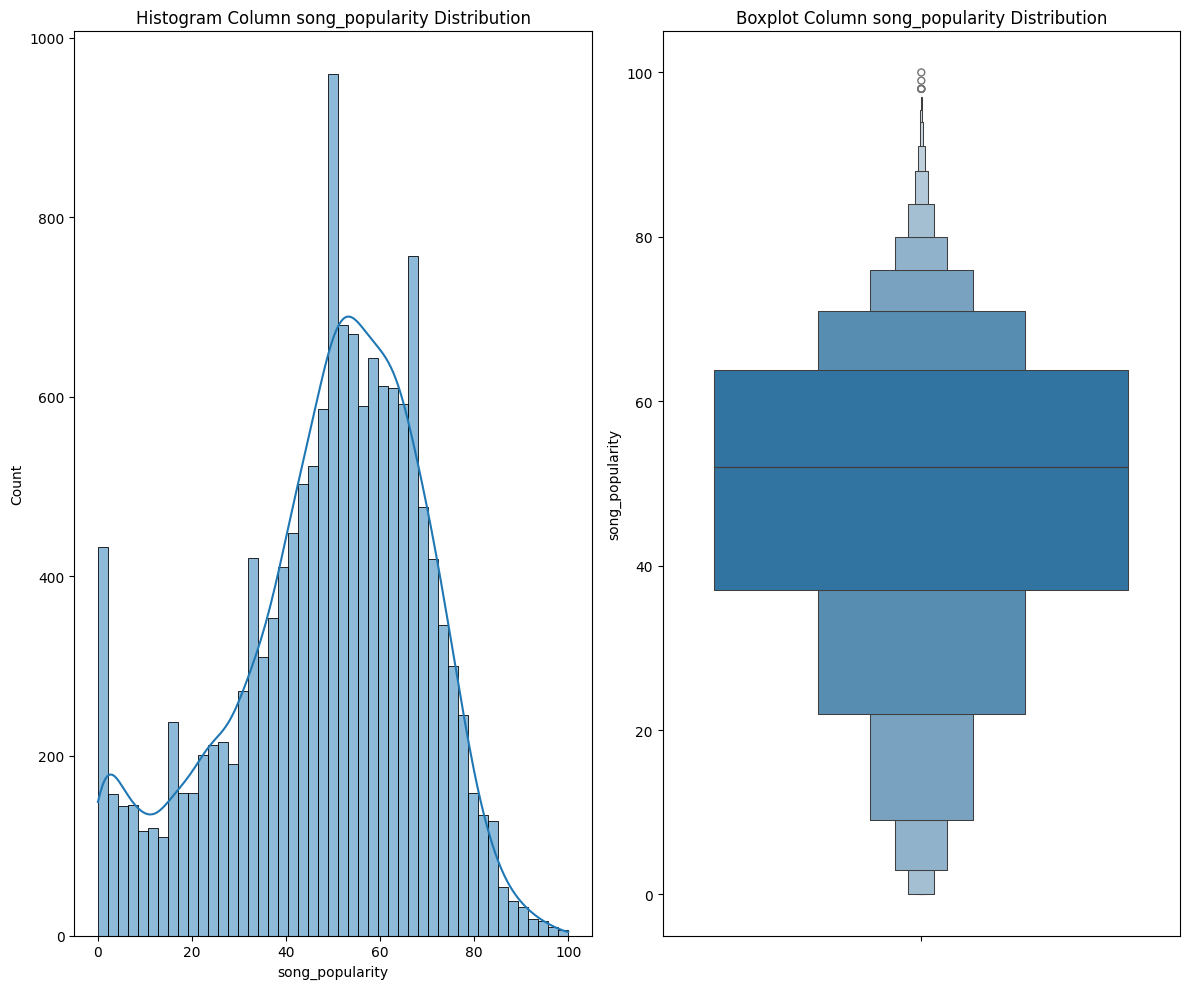

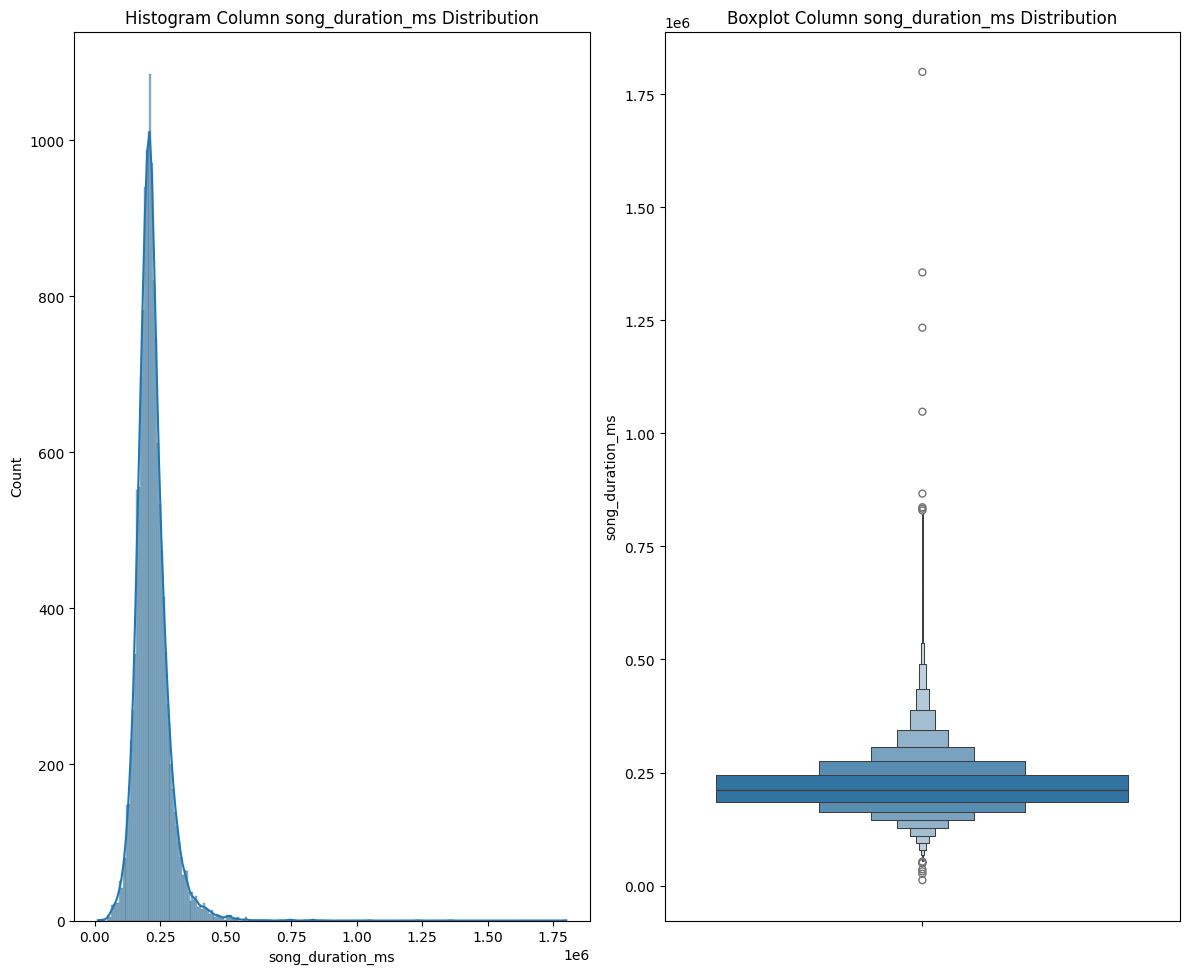

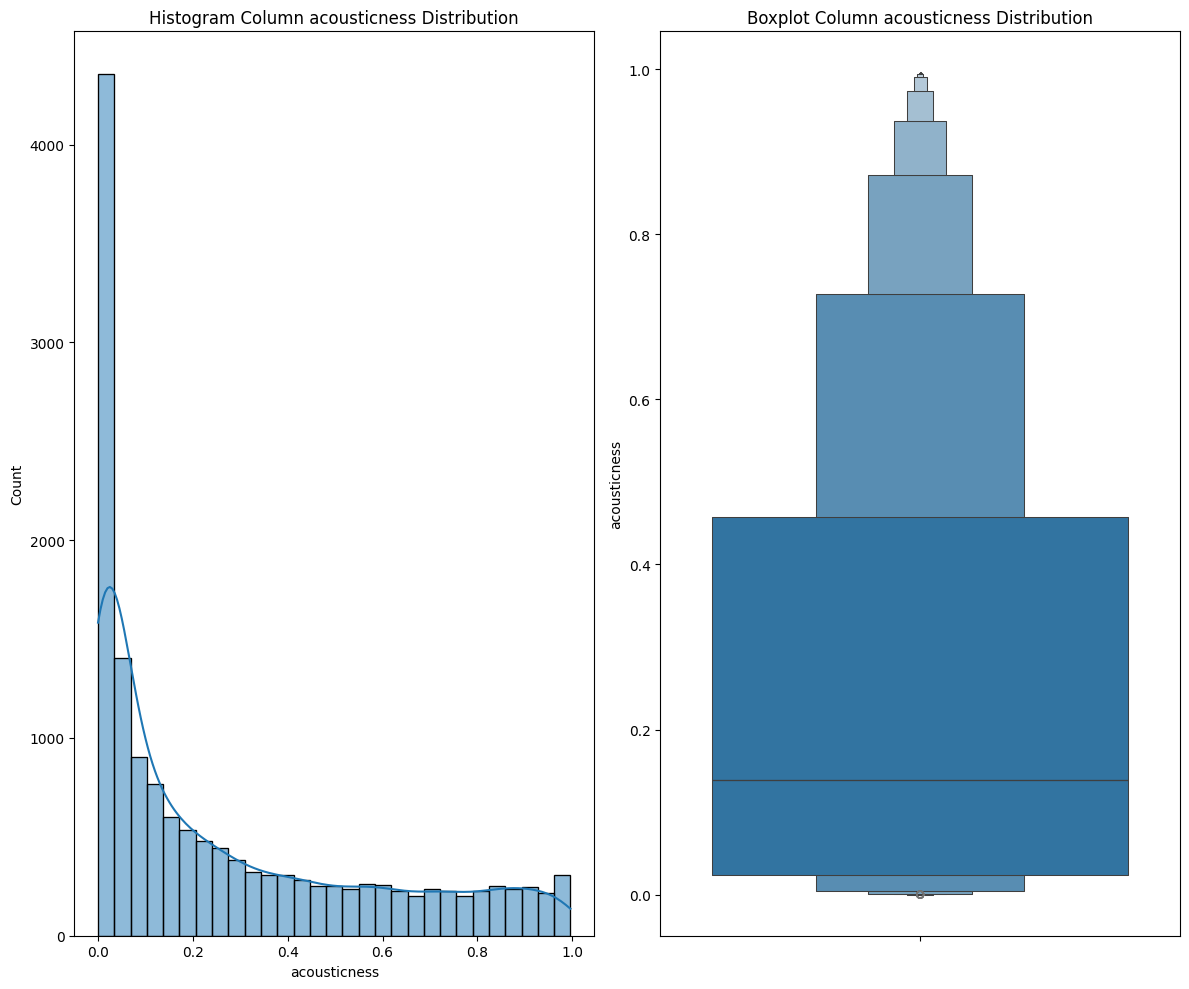

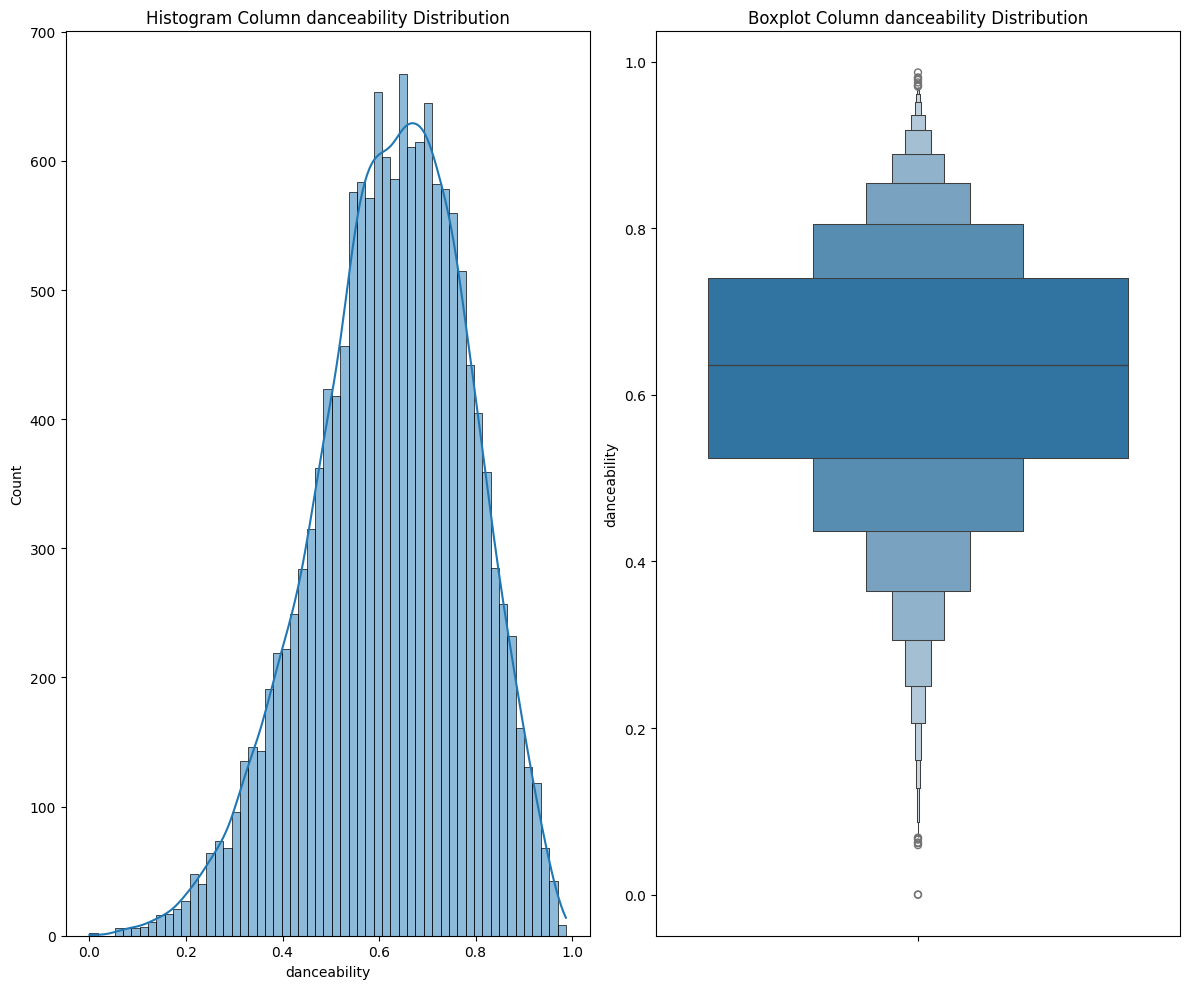

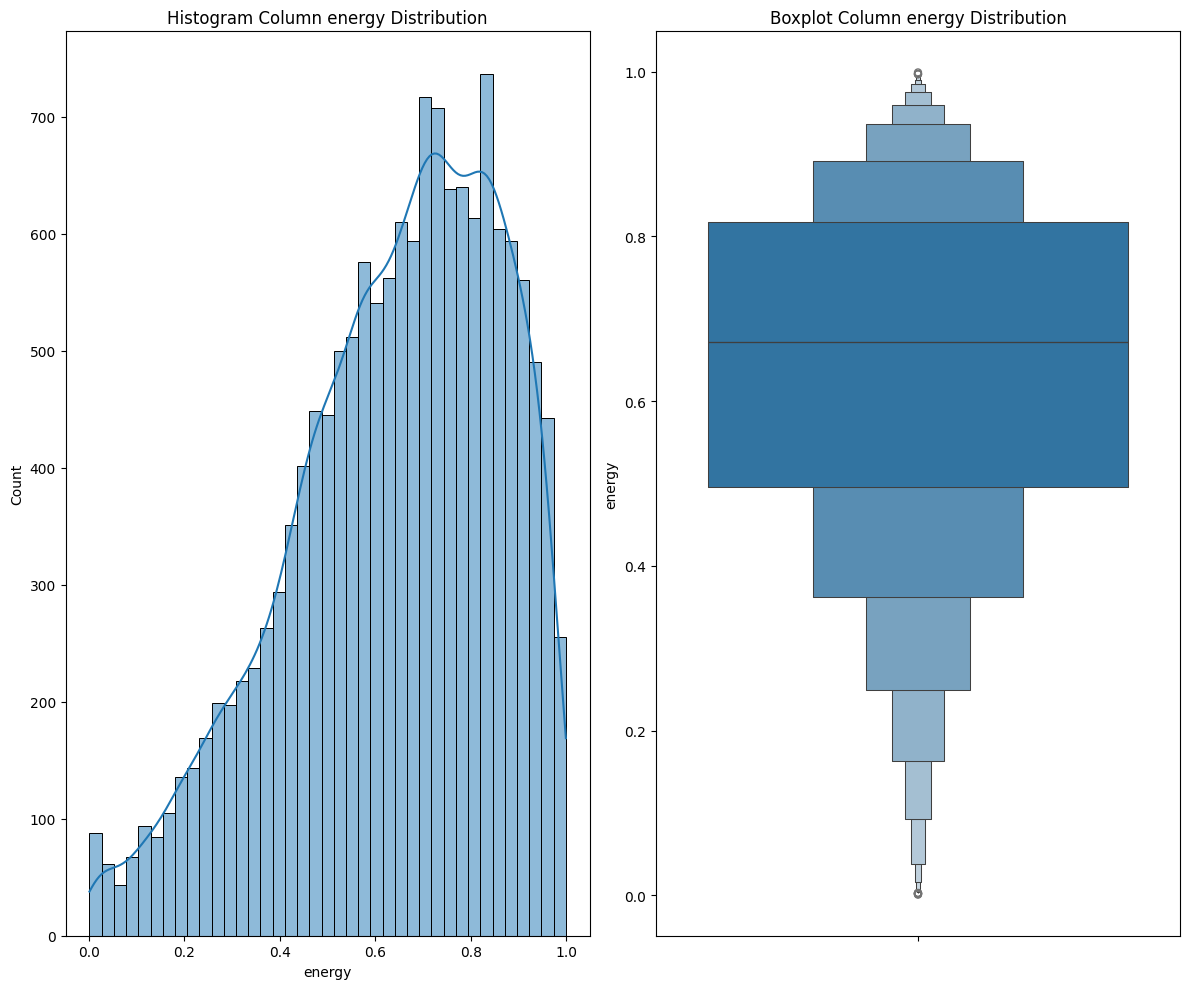

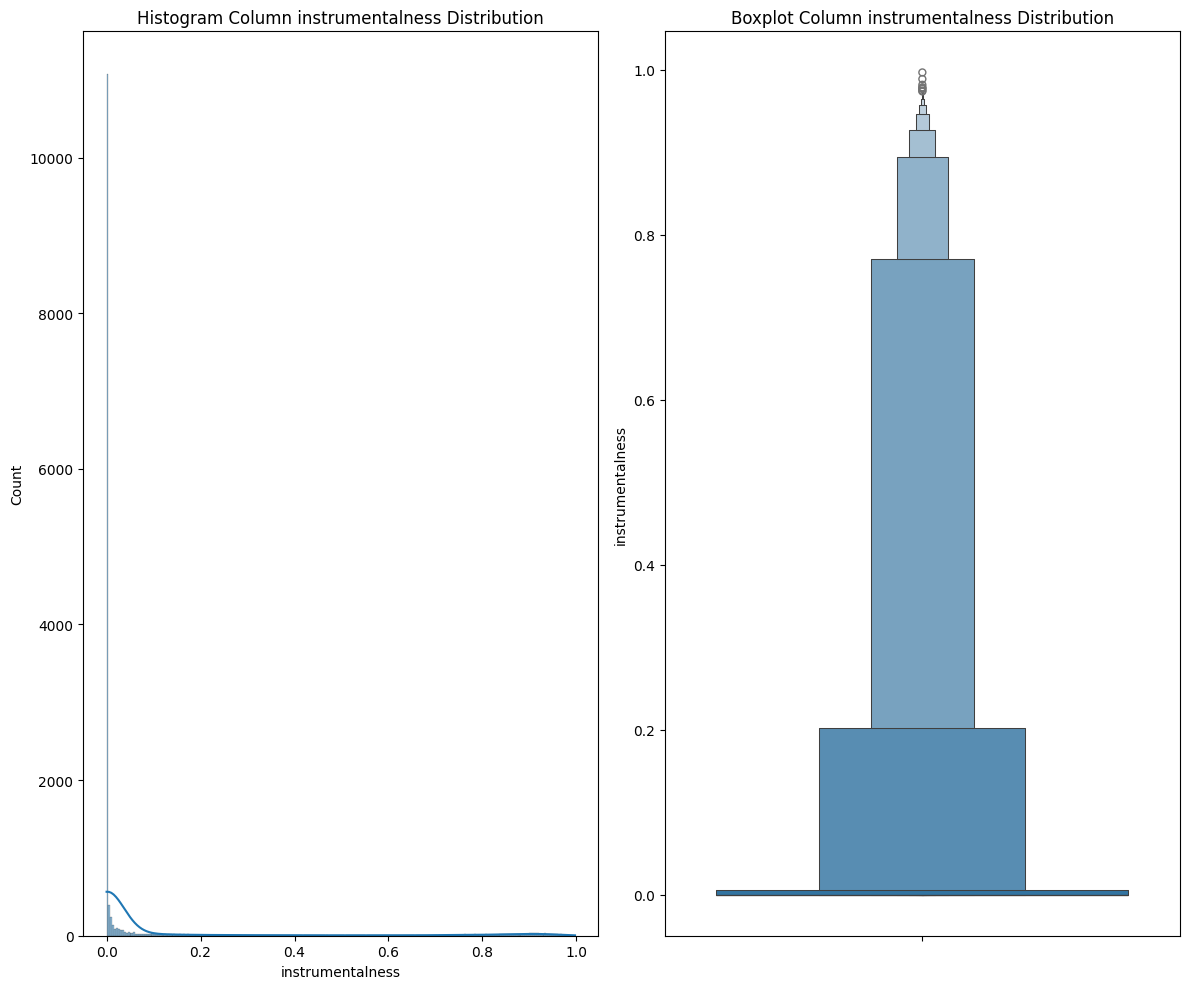

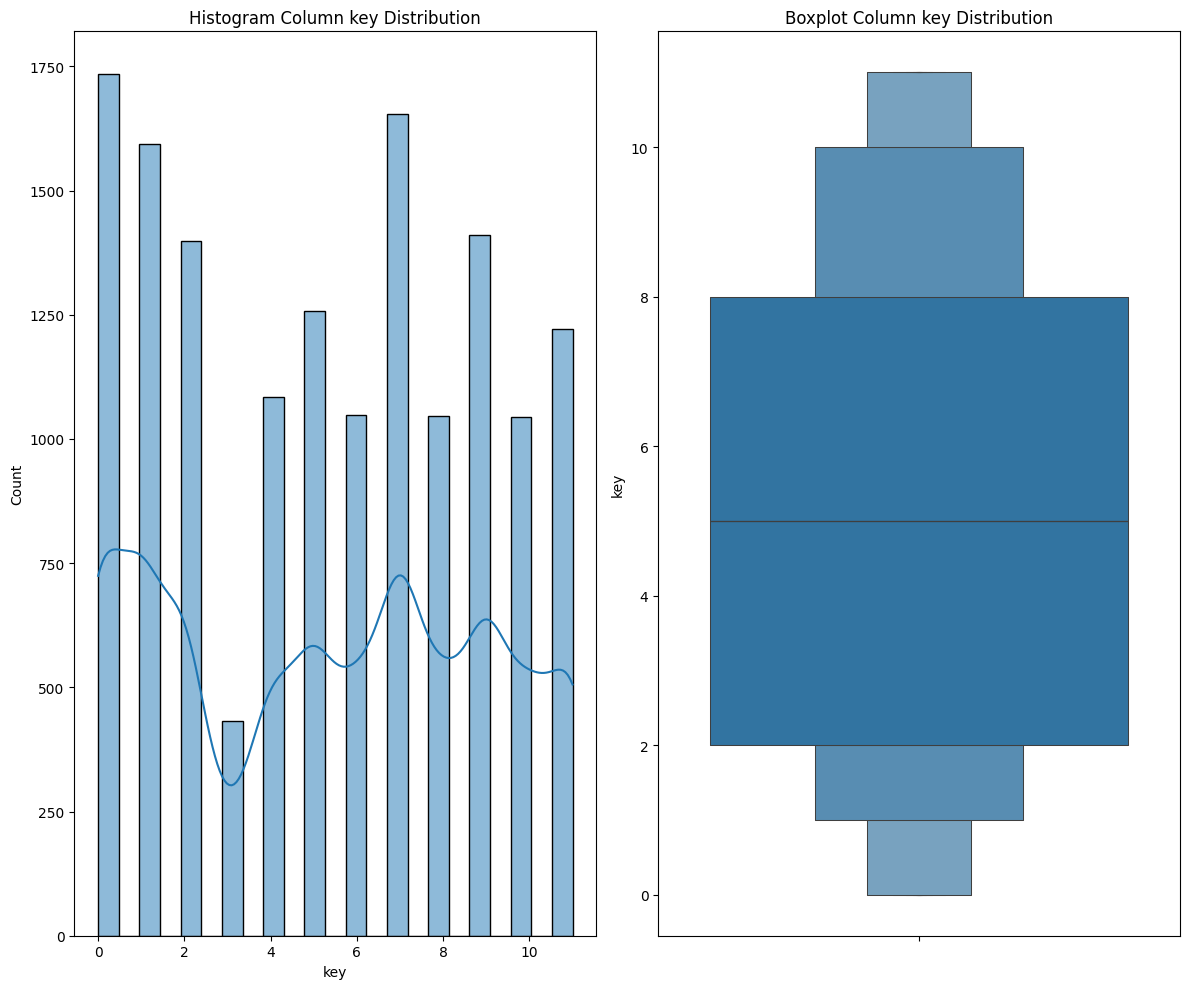

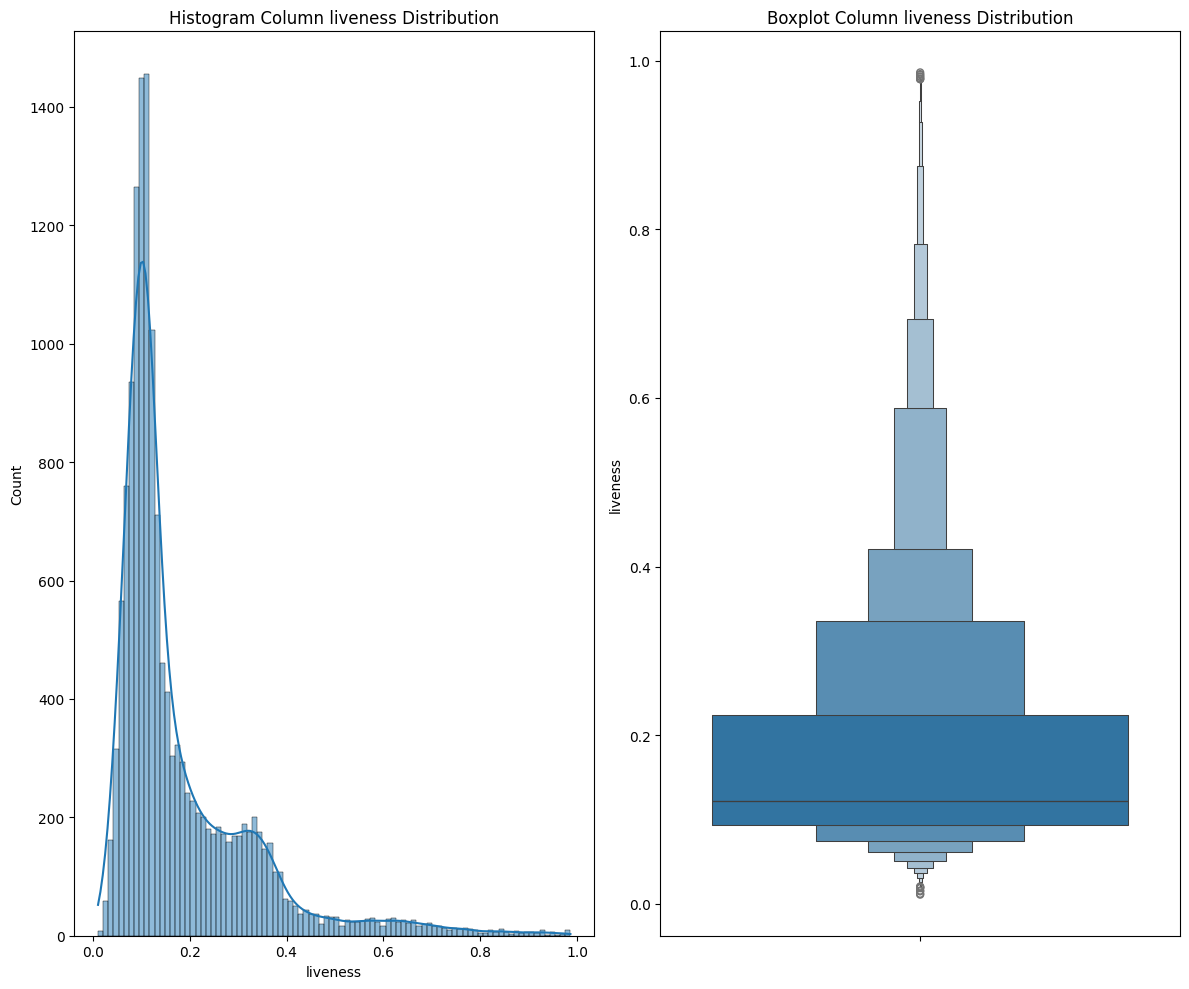

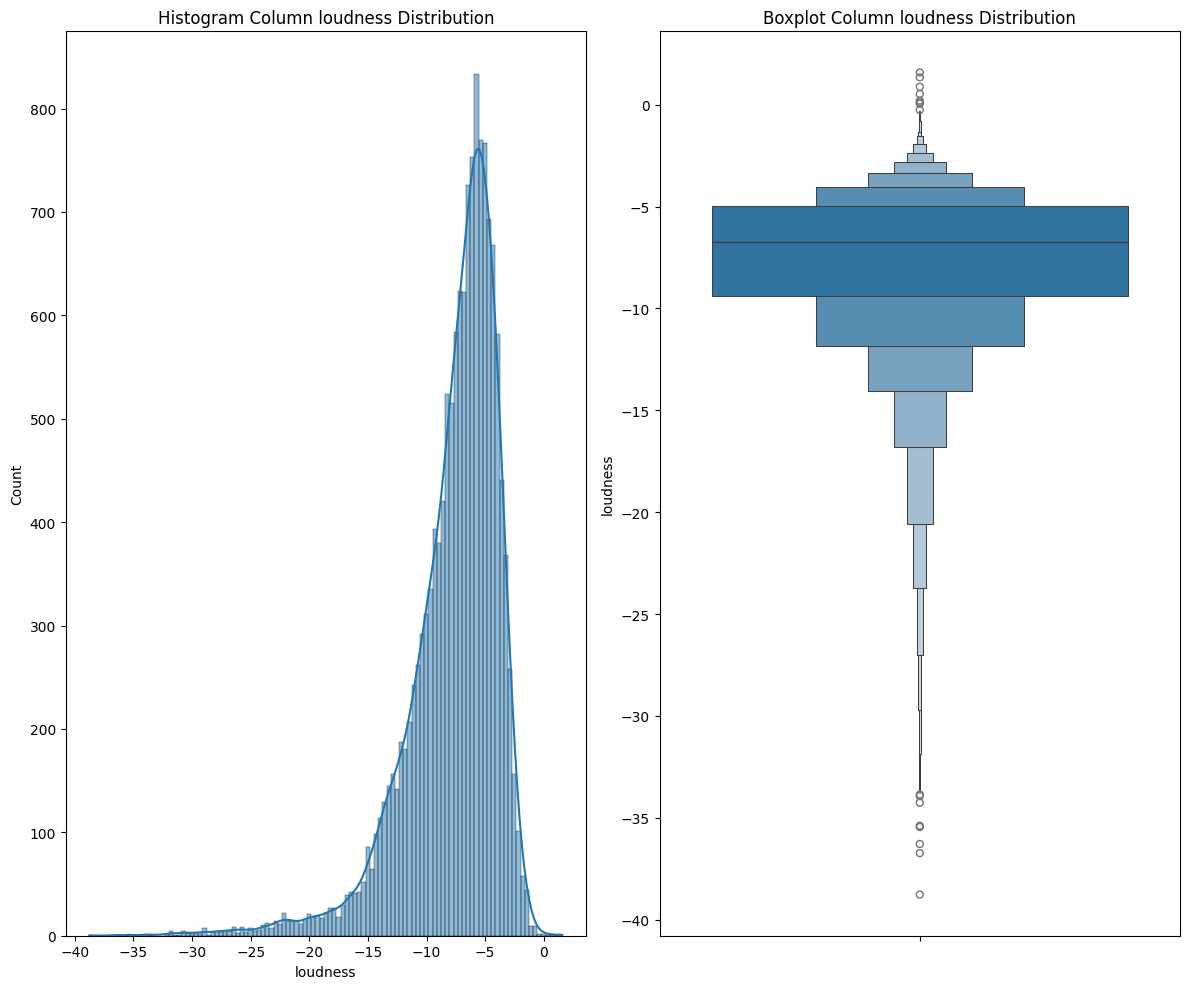

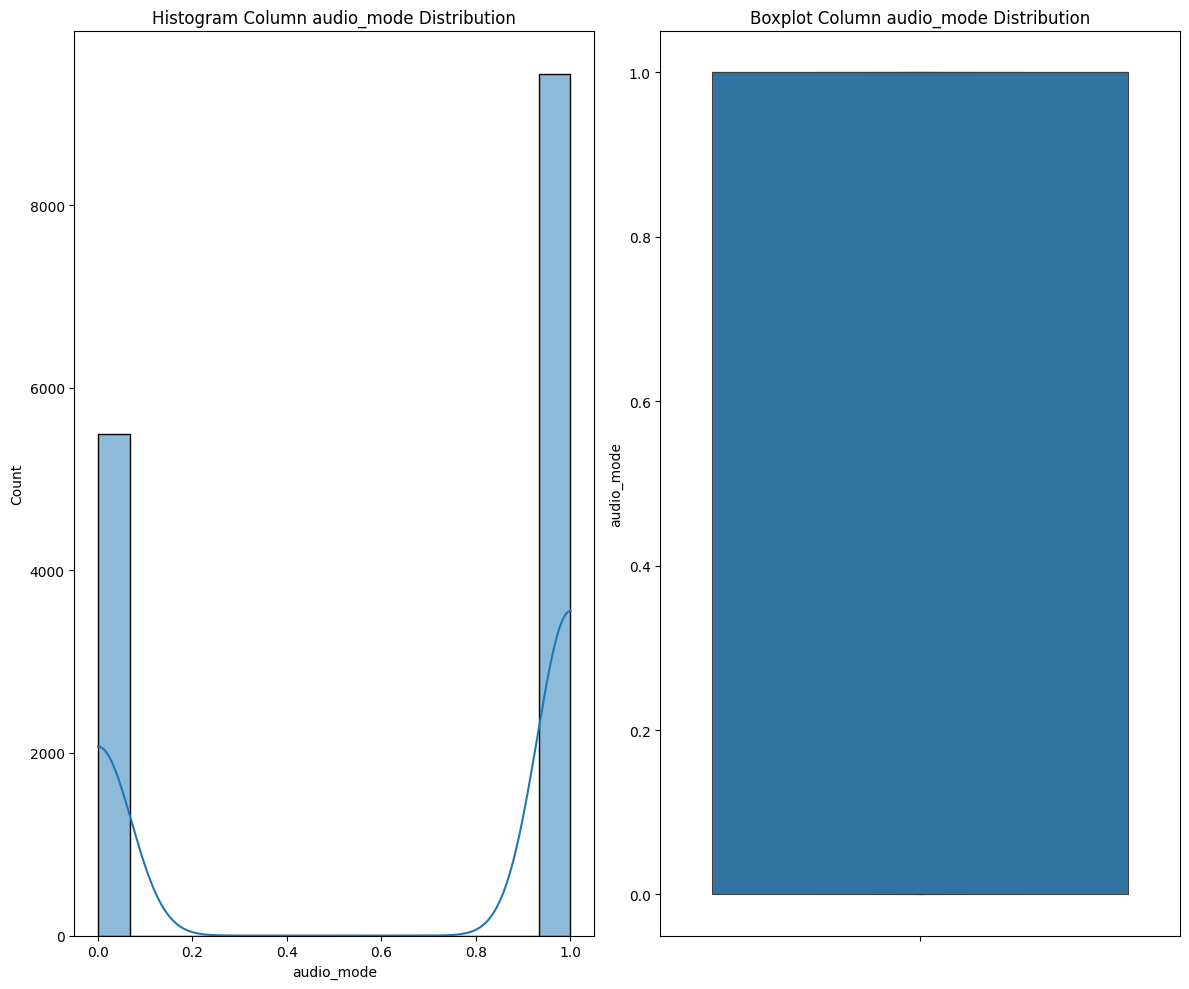

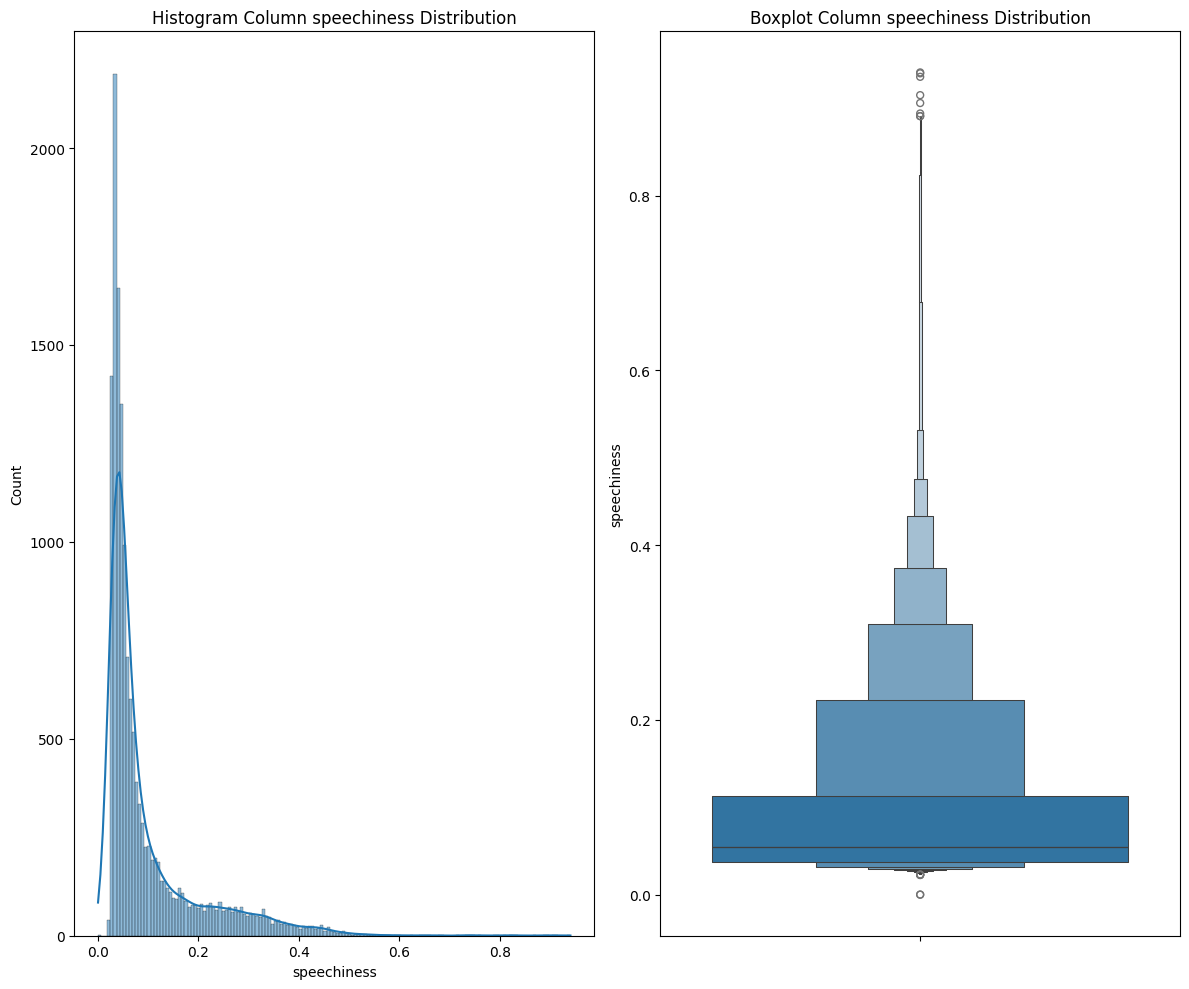

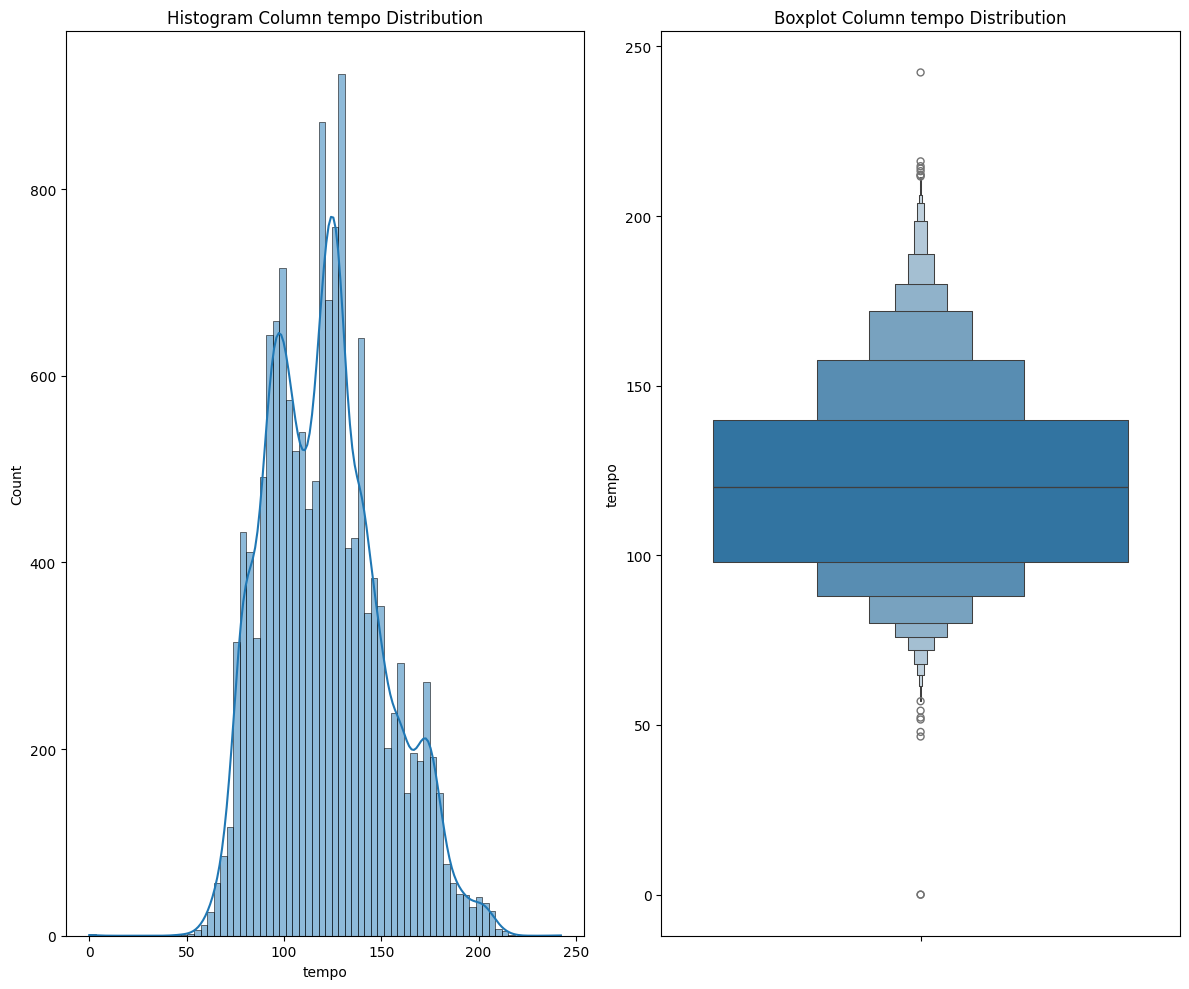

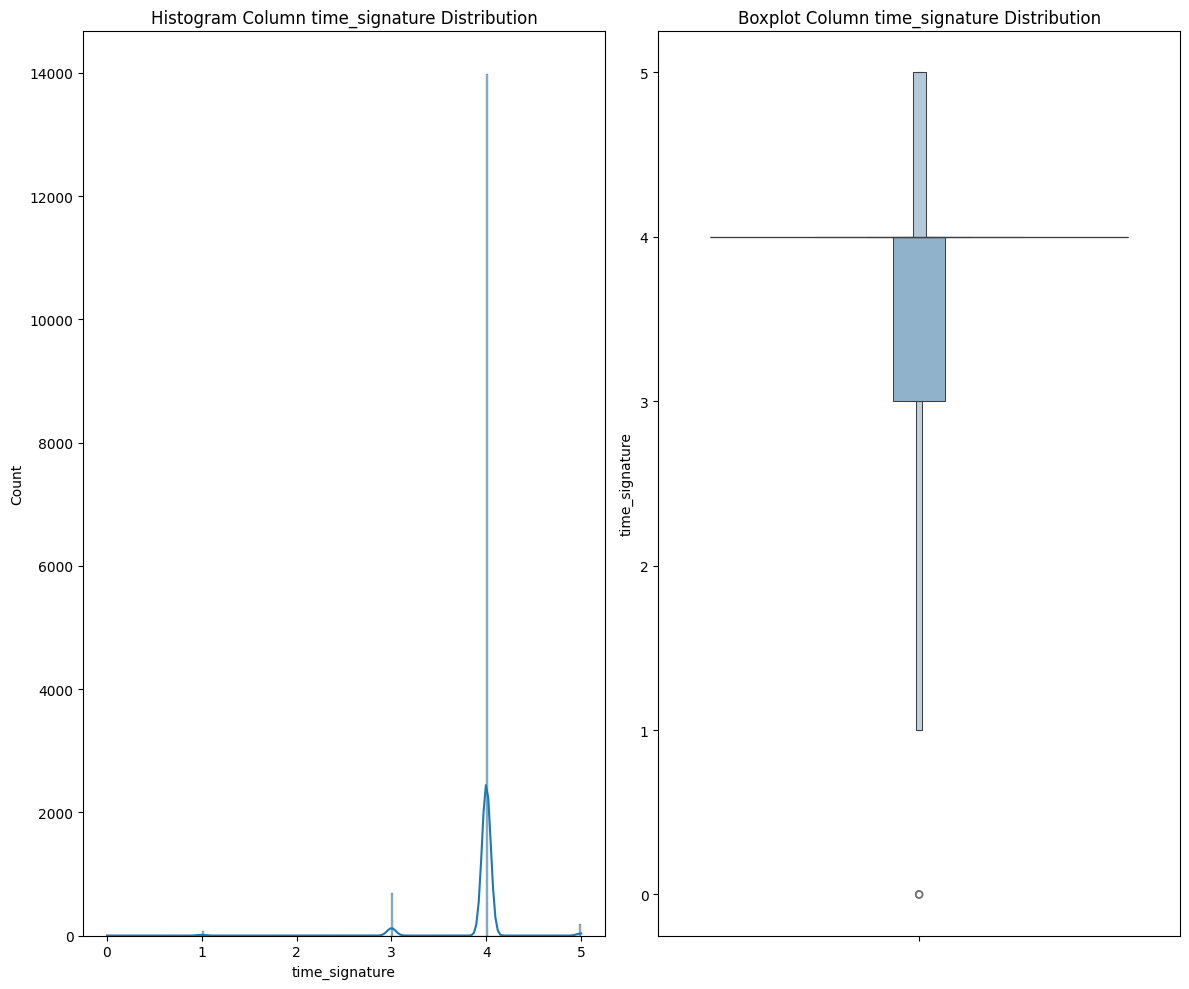

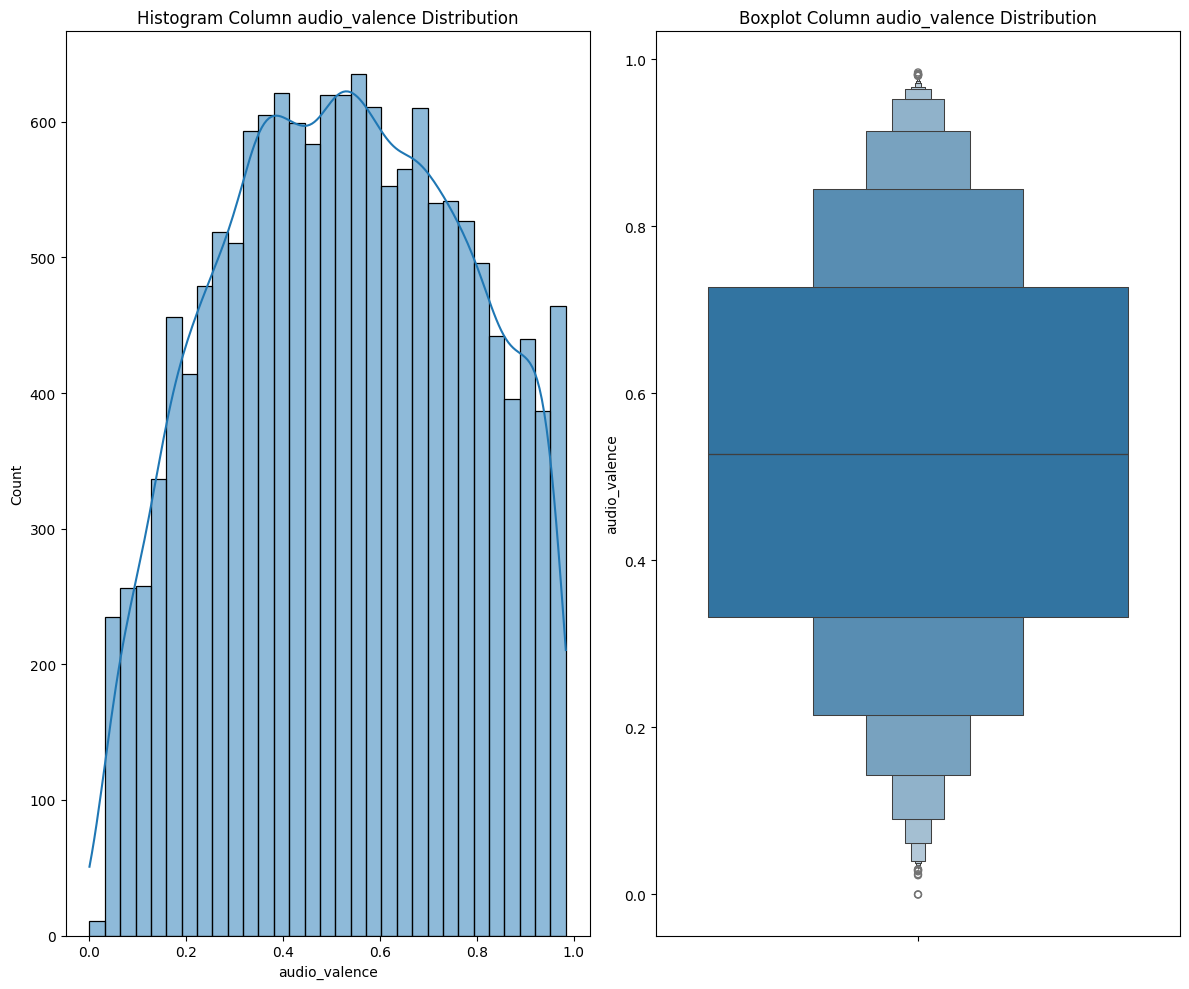

In [35]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram Column {col} Distribution")
    
    sns.boxenplot(df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot Column {col} Distribution")
    plt.tight_layout()

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [36]:
df.drop(columns=['song_name'], inplace=True)

In [37]:
df.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

### B.2 Feature Engineering

#### One Hot Encoding

In [38]:
df = pd.get_dummies(df, columns=['key'], prefix='key', drop_first=True, dtype=int)

In [39]:
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,...,0,0,0,0,0,0,1,0,0,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,...,0,1,0,0,0,0,0,0,0,0
2,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1,0.0792,...,0,0,0,0,0,0,0,0,0,0
3,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,...,0,0,0,0,0,0,0,0,0,0
4,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,...,0,0,0,0,0,0,0,0,1,0


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Target Distribution

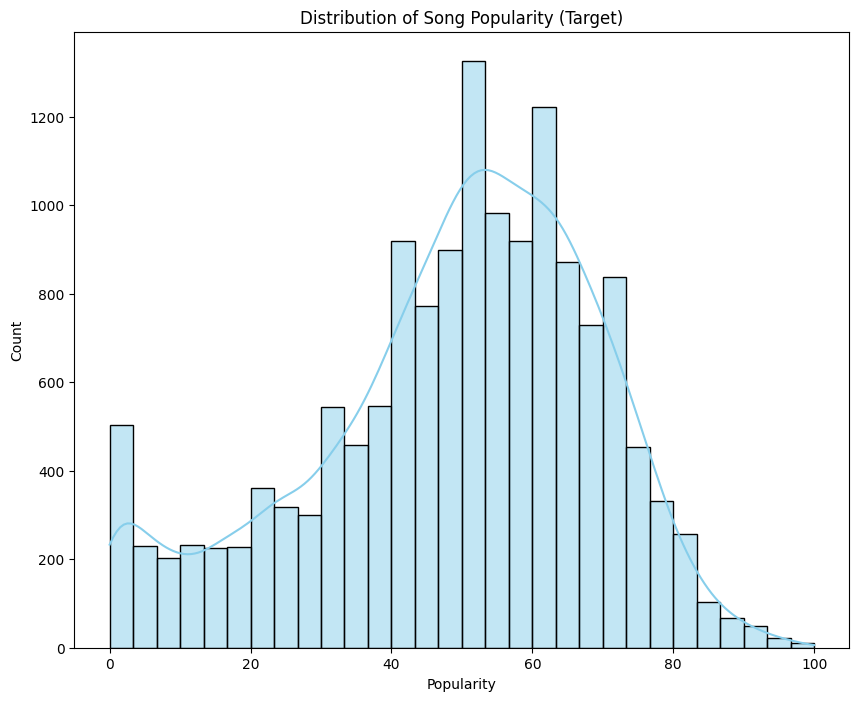

In [40]:
plt.figure(figsize=(10, 8))
sns.histplot(df['song_popularity'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Song Popularity (Target)')
plt.xlabel('Popularity')
plt.show()

#### Feature Distribution

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['age'], kde=True, color='green')
plt.title('Distribution of Song')
plt.xlabel('Workers Age')
plt.show()

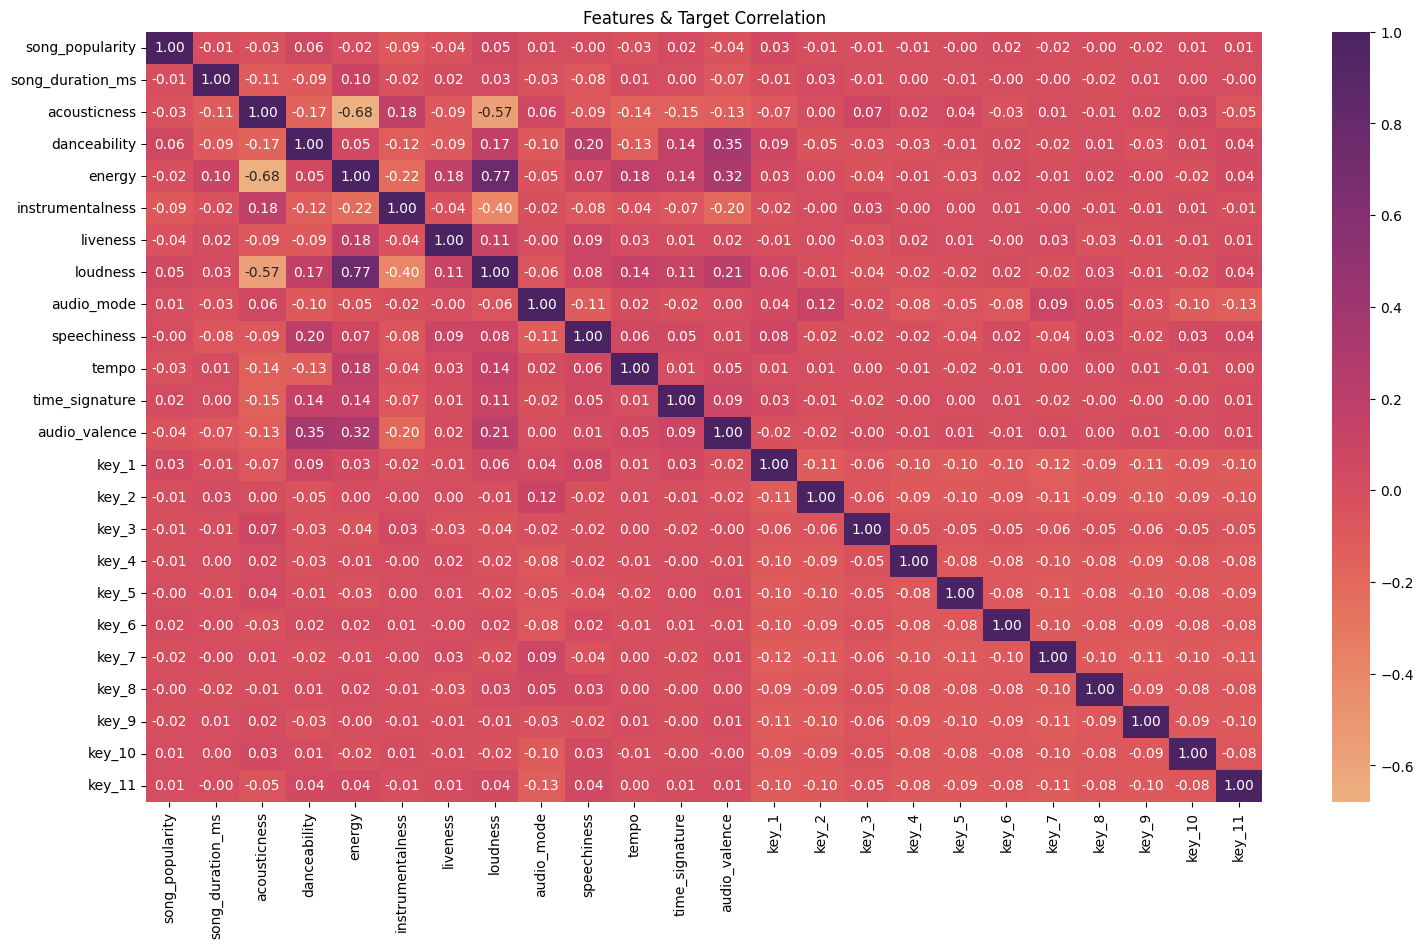

In [42]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, cmap='flare', fmt=".2f")
plt.title("Features & Target Correlation")
plt.show()